In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#/kaggle/input/cat-and-dog/training_set/training_set
#/kaggle/input/cat-and-dog/test_set/test_set

In [2]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

2024-06-24 11:41:41.369893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 11:41:41.370016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 11:41:41.515356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from tensorflow.keras.applications.resnet50 import decode_predictions
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

In [8]:
image = load_img('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3664.jpg',target_size=(224,224))
image_np = img_to_array(image)
image_np = np.expand_dims(image_np,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
predictions =  [[('n02123159', 'tiger_cat', 0.74325806), ('n02124075', 'Egyptian_cat', 0.088208325), ('n02123045', 'tabby', 0.042599637), ('n02971356', 'carton', 0.02166366), ('n04589890', 'window_screen', 0.017872784)]]


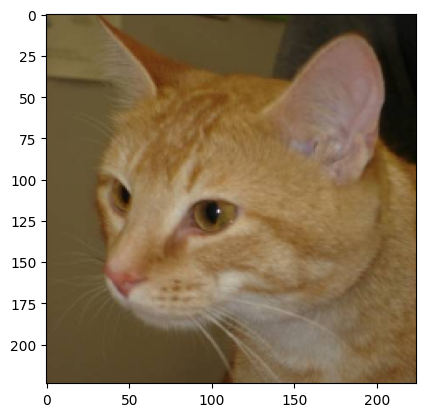

In [9]:
model = resnet50.ResNet50(weights='imagenet')
# Standardize input data.
X = resnet50.preprocess_input(image_np.copy())
# Do prediction.
y = model.predict(X)
predicted_labels = decode_predictions(y)
print('predictions = ', predicted_labels)
# Show image.
plt.imshow(np.uint8(image_np[0]))
plt.show()